In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TDIformer = "long_term_forecast_ETTh1_720_iAutoformer_ETTh1_ftMS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_'Exp'_0"
iTransformer = "long_term_forecast_ETTh1_720_iTransformer_ETTh1_ftMS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_'Exp'_0"
TimesNet = "long_term_forecast_ETTh1_720_TimesNet_ETTh1_ftMS_sl96_ll48_pl720_dm16_nh8_el2_dl1_df32_expand2_dc4_fc3_ebtimeF_dtTrue_'Exp'_0"
Informer = "long_term_forecast_ETTh1_720_Informer_ETTh1_ftMS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_'Exp'_0"

In [3]:
TDIformer_preds = np.load('./results/' + TDIformer + '/pred.npy')
iTransformer_preds = np.load('./results/' + iTransformer + '/pred.npy')
TimesNet_preds = np.load('./results/' + TimesNet + '/pred.npy')
Informer_preds = np.load('./results/' + Informer + '/pred.npy')
trues = np.load('./results/' + TDIformer + '/true.npy')

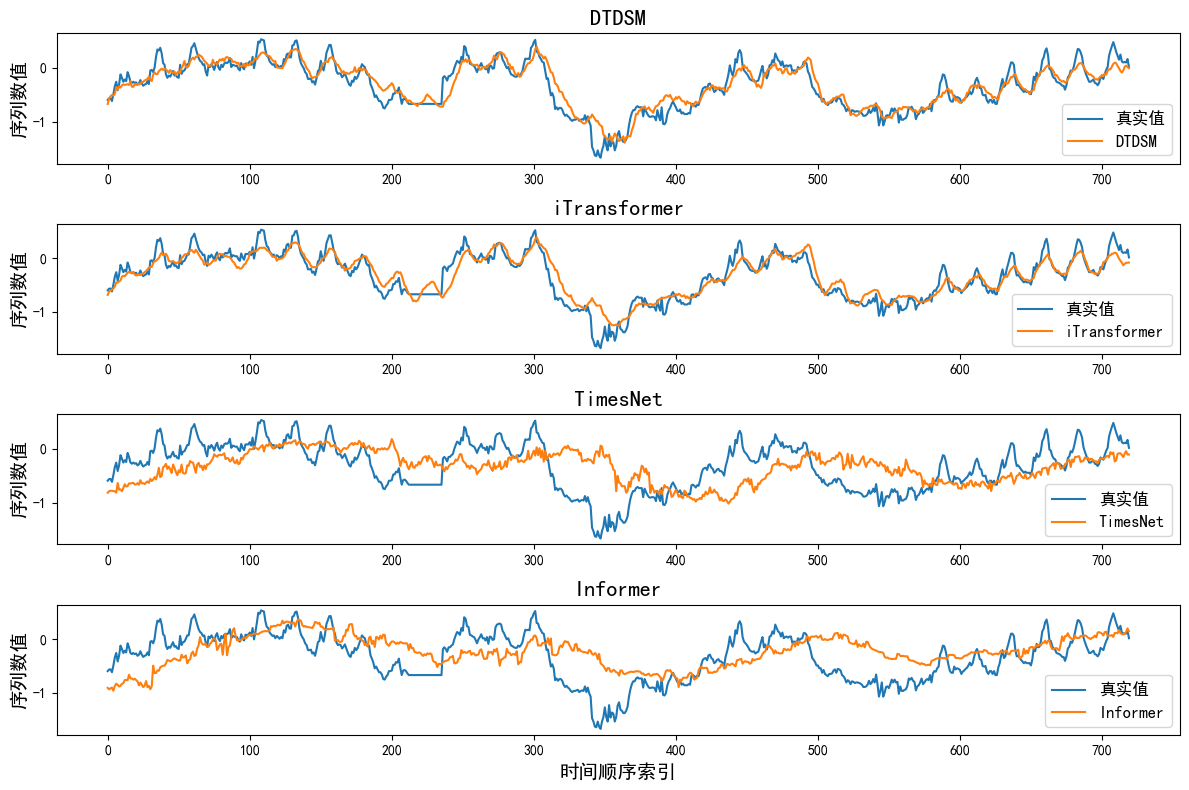

In [4]:
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建一个更高的图形
plt.figure(figsize=(12, 8))

# 字体大小设置
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

# 第一个子图 - TDIformer
plt.subplot(4, 1, 1)
plt.plot(trues[:, 0, -1].reshape(-1)[:720], label='真实值')
plt.plot(TDIformer_preds[:, 0, -1].reshape(-1)[:720], label='DTDSM')
plt.title('DTDSM', fontsize=title_fontsize)
plt.ylabel('序列数值', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)

# 第二个子图 - iTransformer
plt.subplot(4, 1, 2)
plt.plot(trues[:, 0, -1].reshape(-1)[:720], label='真实值')
plt.plot(iTransformer_preds[:, 0, -1].reshape(-1)[:720], label='iTransformer')
plt.title('iTransformer', fontsize=title_fontsize)
plt.ylabel('序列数值', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)

# 第三个子图 - TimesNet
plt.subplot(4, 1, 3)
plt.plot(trues[:, 0, -1].reshape(-1)[:720], label='真实值')
plt.plot(TimesNet_preds[:, 0, -1].reshape(-1)[:720], label='TimesNet')
plt.title('TimesNet', fontsize=title_fontsize)
plt.ylabel('序列数值', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)

# 第四个子图 - Informer
plt.subplot(4, 1, 4)
plt.plot(trues[:, 0, -1].reshape(-1)[:720], label='真实值')
plt.plot(Informer_preds[:, 0, -1].reshape(-1)[:720], label='Informer')
plt.title('Informer', fontsize=title_fontsize)
plt.xlabel('时间顺序索引', fontsize=label_fontsize)
plt.ylabel('序列数值', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

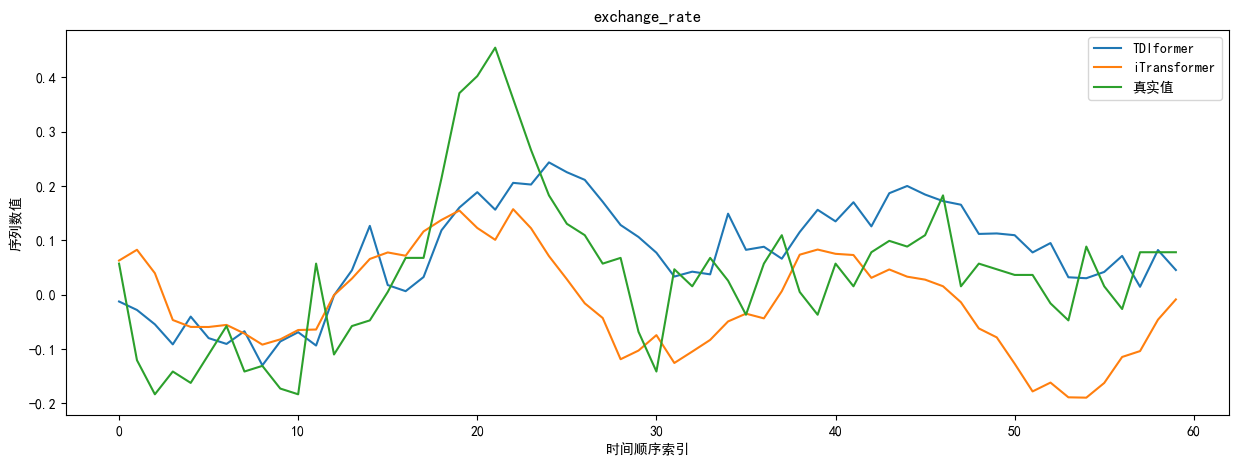

In [4]:
# 设置字体
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建一个更宽的图形
plt.figure(figsize=(15, 5))

# 绘制真实值和预测值
plt.plot(TDIformer_preds[:, 0, -1].reshape(-1)[40:100], label='TDIformer')
plt.plot(iTransformer_preds[:, 0, -1].reshape(-1)[40:100], label='iTransformer')
plt.plot(trues[:, 0, -1].reshape(-1)[40:100], label='真实值')

# 设置标题和图例
plt.title('exchange_rate')
plt.xlabel('时间顺序索引')
plt.ylabel('序列数值')
plt.legend()

# 显示图形
plt.show()

In [25]:
import pandas as pd
# 去掉多余的维度，得到形状为 (720, 1) 的数组
TDIformer = TDIformer_preds[:, 0, -1].reshape(-1)
iTransformer = iTransformer_preds[:, 0, -1].reshape(-1)
TimesNet = TimesNet_preds[:, 0, -1].reshape(-1)
Informer = Informer_preds[:, 0, -1].reshape(-1)
real_data = trues[:, 0, -1].reshape(-1)
 # 将数组转换为 DataFrame
data = {
    'trues': real_data,
    'TDIformer': TDIformer,
    'iTransformer': iTransformer,
    'TimesNet': TimesNet,
    'Informer': Informer
}
df = pd.DataFrame(data)
len(df)

864

In [26]:
df.to_csv('output_data/real_ETTh1.csv',index=False)